In [1]:
import igraph as ig
import pandas as pd

# Zachary
Let's work with a famous dataset: Zachary.

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club

In [2]:
g = ig.Graph.Famous('Zachary')

We can plot it because it is not that big :)

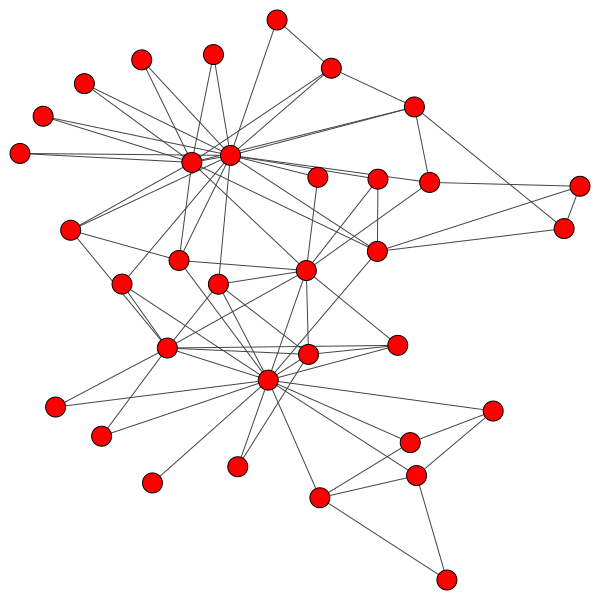

In [3]:
ig.plot(g)

# Detection algorithms

Let's start using community detection algorithms to discover the split in the Karate club.

Here https://igraph.org/python/api/develop/igraph.community.html you can find the doc for Community detection algorithms.

For example let's use louvain algorithm (https://igraph.org/python/api/develop/igraph.community.html#_community_fastgreedy)

In [4]:
louvain = g.community_fastgreedy()

In [5]:
print(louvain)

Dendrogram, 34 elements, 33 merges

18 22 15 8 30 32 24 25 31 28 26 29 33 23 27 14 20 7 3 12 9 2 13 1 17 21 19 16 5 6 0 4 10 11
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  |  | | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  `--' | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   |   | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   `---' | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     |   | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     `---' | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       |   | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       `---' |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |         |   |  |
|  |  |  | |  |  |  |  |  |  `--'  |  |  |  |  |  | |

Remember Louvain algorithm is iterative. That is why we get a dendogram as a result. We can run .as_clustering() to get the different clusterings

In [6]:
print(louvain.as_clustering(2))

Clustering with 34 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21
[1] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [7]:
for i in range(1, 10):
    print(louvain.as_clustering(i))
    print(g.modularity(louvain.as_clustering(i)))

Clustering with 34 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.0
Clustering with 34 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21
[1] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.3717948717948718
Clustering with 34 elements and 3 clusters
[0] 0, 4, 5, 6, 10, 11, 16, 19
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
0.38067061143984227
Clustering with 34 elements and 4 clusters
[0] 0, 4, 5, 6, 10, 11, 16
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
[3] 19
0.3759861932938856
Clustering with 34 elements and 5 clusters
[0] 0, 4, 5, 6, 10, 11, 16
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
[3] 19
[4] 20
0.3628369493754109
Clustering with 34 elemen

We can plot the graph with different colors per group.

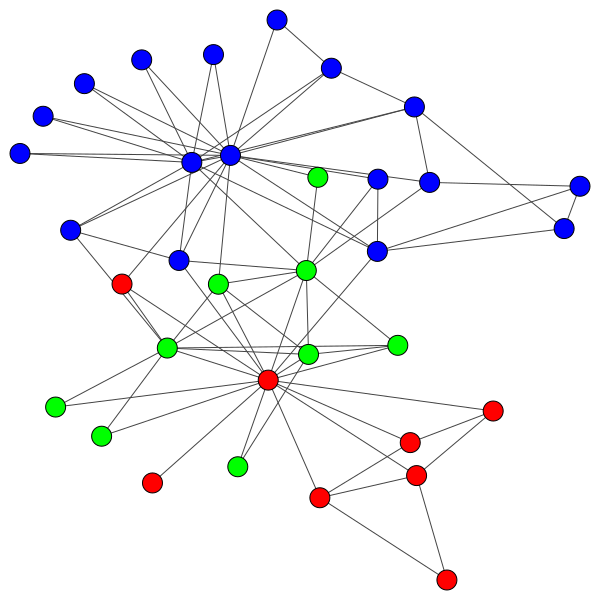

In [8]:
pal = ig.drawing.colors.ClusterColoringPalette(len(louvain.as_clustering(3)))
g.vs['color'] = pal.get_many(louvain.as_clustering(3).membership)
ig.plot(g)

## Exercise: Try using different algorithms and meassure their modularity

# Information Diffusion
We are going to use NDlib for modelling the information diffusion. In order to work with that library, we are also using networkx. Another library for graphs which is compatible with it.

In [12]:
# create network
import networkx as nx 
# visualization and i/o
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
%matplotlib inline
from matplotlib import cm
import imageio
import os

# network diffusion library
#!pip3 install ndlib
import ndlib.models.ModelConfig as mc 
import ndlib.models.epidemics as ep

We continue using the karate club

In [13]:
g=nx.karate_club_graph()

We are now defining the model to use for information diffusion. In this case we are using a SIR model and we start with a 5% of the nodes infected by random.

In [14]:
# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.4)
cfg.add_model_parameter("gamma", 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
n_iters = 20 # number of iterations
iterations = model.iteration_bunch(n_iters)


# print a node's possible states
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

We also define a function to plot the different iterations of the model. You should use this functio to plot your experiments.

In [15]:
def print_evolution(iterations, g, model):
    # choose a color palette
    cmap = cm.get_cmap('Set1')
    colors = []
    for i in range(cmap.N):
        rgb = cmap(i)
        colors.append(rgb)
    # create a shortcut dict
    status_dict = dict()
    for status, code in model.available_statuses.items():
      status_dict[str(code)] = {
          'status': status,
          'color': colors[code]
      }
    pos = nx.spring_layout(g) # fix node positions
    for t, iter in enumerate(iterations):

        # assign status to each node
        status = iter['status']
        nx.set_node_attributes(g, status, name='status')


        # plot network
        plt.title(f'Network state at t={t}')
        nx.draw(g,
                pos=pos,
                with_labels=True,
                node_color=[
                            status_dict[str(c['status'])]['color'] 
                            for n, c in g.nodes(data=True)
                            ]
                )

        # plot legend
        handles = []
        for id, dic in status_dict.items():
            S=mlines.Line2D([], [], color=dic['color'],
                        marker='o',markersize=10,
                        linewidth=0,label=dic['status'])
            handles.append(S)

        plt.legend(handles=handles,loc=0)
        plt.savefig(f't{t}.png')
        plt.show()

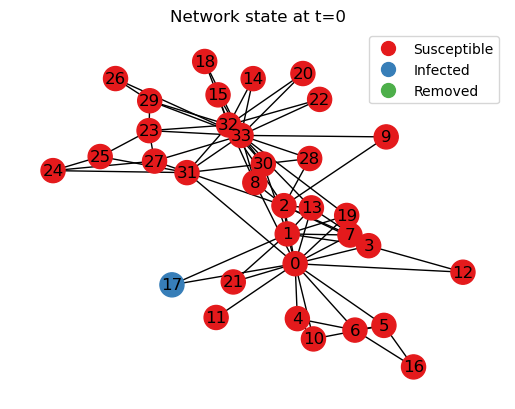

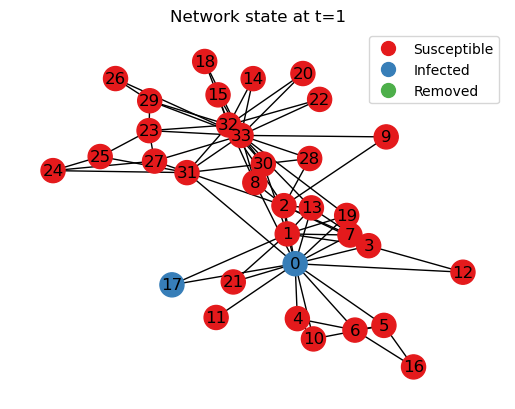

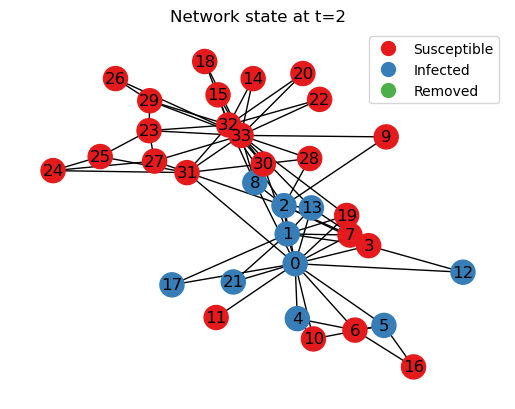

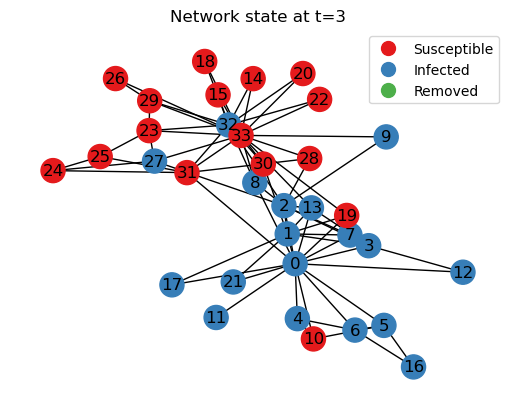

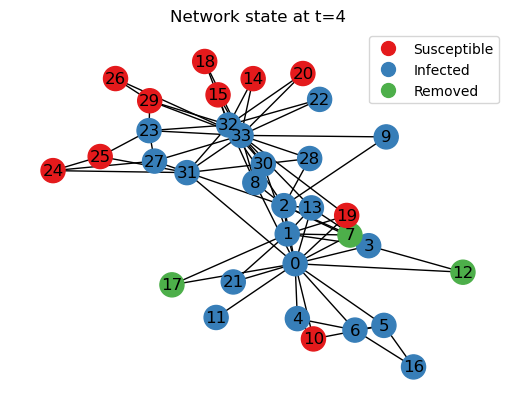

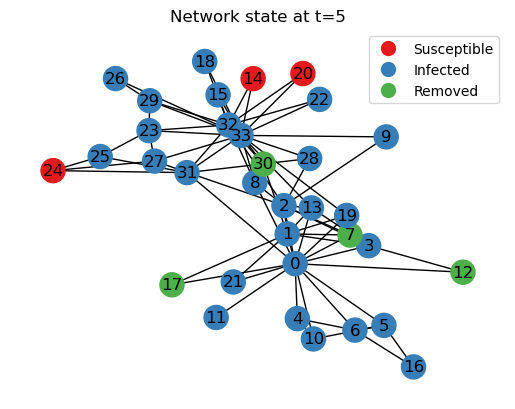

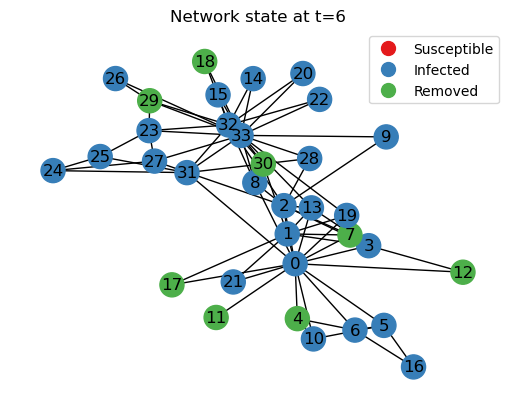

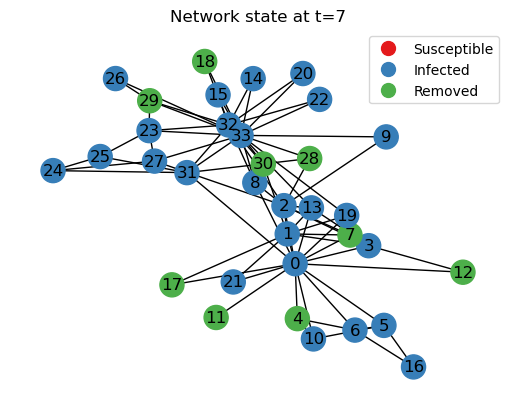

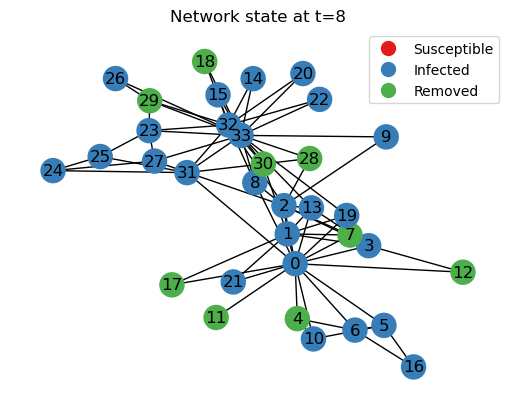

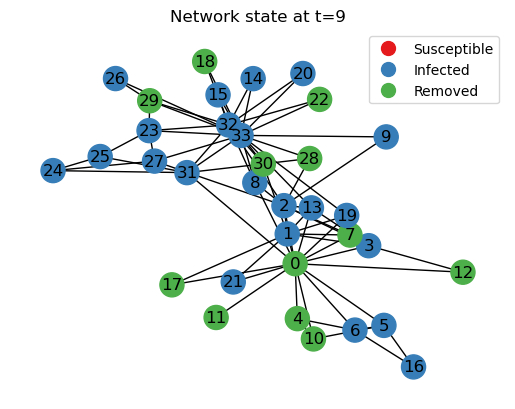

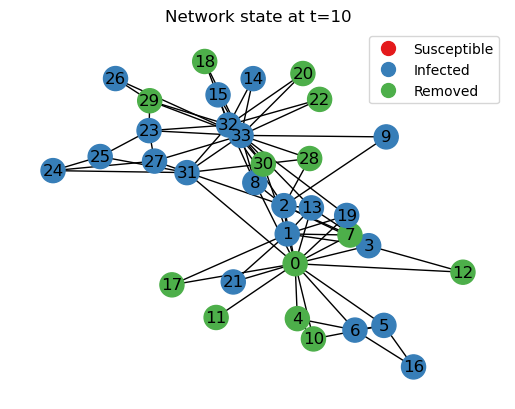

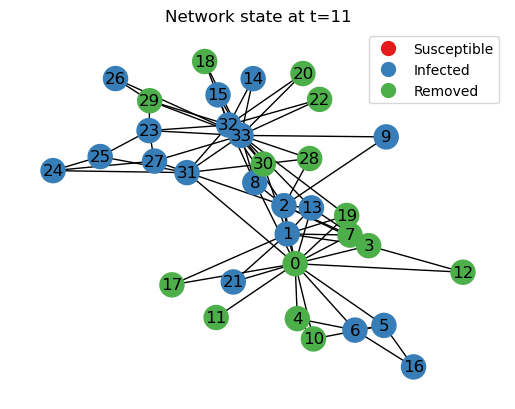

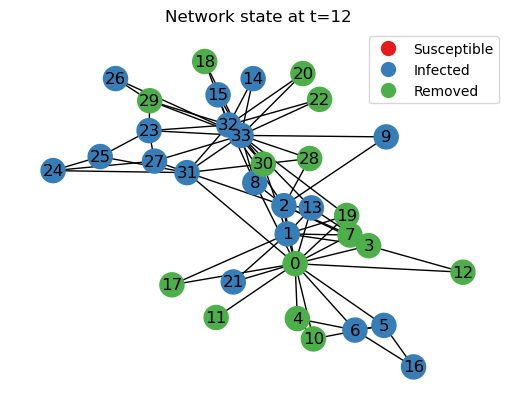

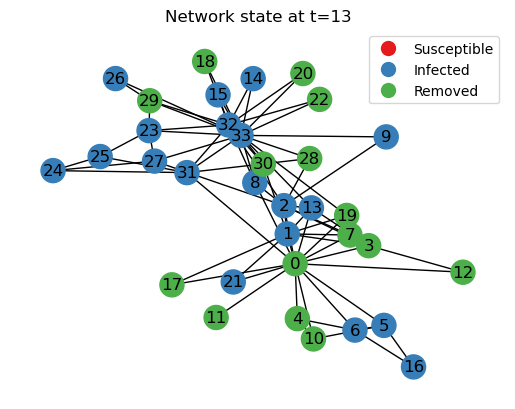

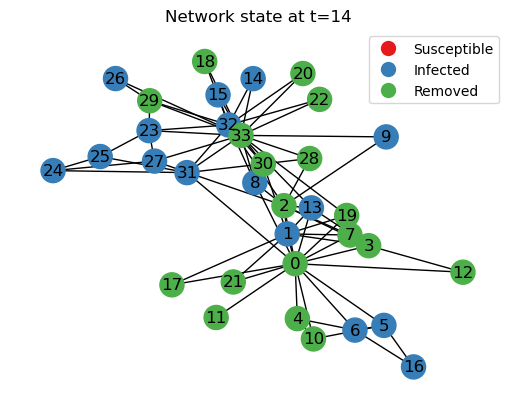

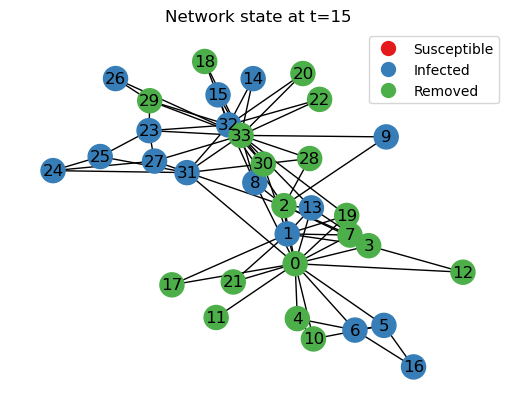

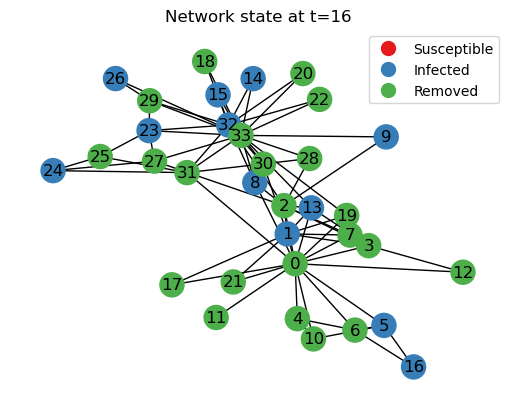

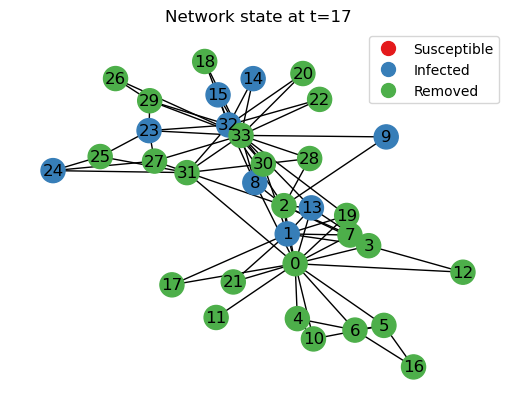

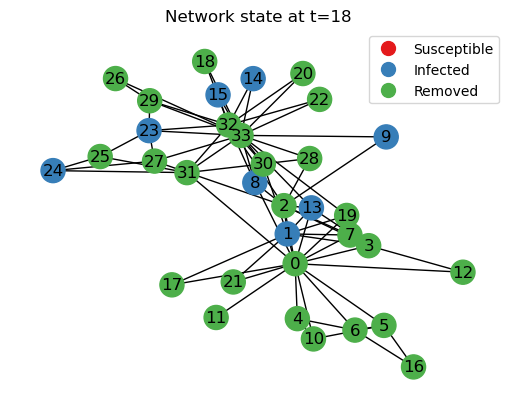

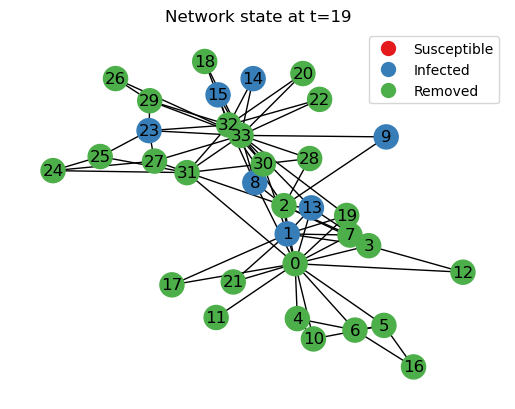

In [16]:
print_evolution(iterations, g, model)

## Exercise
If you change the parameter fraction infected (cfg.add_model_parameter("fraction_infected", 0.05)) by cfg.add_model_initial_configuration("Infected", infected_nodes)
where infected_nodes is a list of the nodes which start the propagation.
Start for example with infected_nodes=[24]

In [29]:
#which node number has the highest degree centrality?
nx.degree_centrality(g)

# print to a df for easier reading and order ascending degree centrality
pd.DataFrame.from_dict(nx.degree_centrality(g), orient='index', columns=['degree centrality']).sort_values(by='degree centrality', ascending=False)


degree centrality
33           0.515152
0            0.484848
32           0.363636
2            0.303030
1            0.272727
3            0.181818
31           0.181818
23           0.151515
8            0.151515
13           0.151515
27           0.121212
29           0.121212
30           0.121212
7            0.121212
6            0.121212
5            0.121212
10           0.090909
28           0.090909
4            0.090909
19           0.090909
25           0.090909
24           0.090909
26           0.060606
18           0.060606
22           0.060606
21           0.060606
20           0.060606
16           0.060606
15           0.060606
14           0.060606
12           0.060606
9            0.060606
17           0.060606
11           0.030303

In [30]:
#which node number has the highest betweenness centrality?
nx.betweenness_centrality(g)

# print to a df for easier reading and order ascending betweenness centrality
pd.DataFrame.from_dict(nx.betweenness_centrality(g), orient='index', columns=['betweenness centrality']).sort_values(by='betweenness centrality', ascending=False)

betweenness centrality
0                 0.437635
33                0.304075
32                0.145247
2                 0.143657
31                0.138276
8                 0.055927
1                 0.053937
13                0.045863
19                0.032475
5                 0.029987
6                 0.029987
27                0.022333
23                0.017614
30                0.014412
3                 0.011909
25                0.003840
29                0.002922
24                0.002210
28                0.001795
9                 0.000848
10                0.000631
4                 0.000631
26                0.000000
18                0.000000
22                0.000000
21                0.000000
20                0.000000
16                0.000000
15                0.000000
14                0.000000
12                0.000000
11                0.000000
7                 0.000000
17                0.000000

In [31]:
# Model selection
model = ep.SIRModel(g)
infected_nodes=[33]
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.4)
cfg.add_model_parameter("gamma", 0.1)
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
n_iters = 20 # number of iterations
iterations = model.iteration_bunch(n_iters)


# print a node's possible states
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

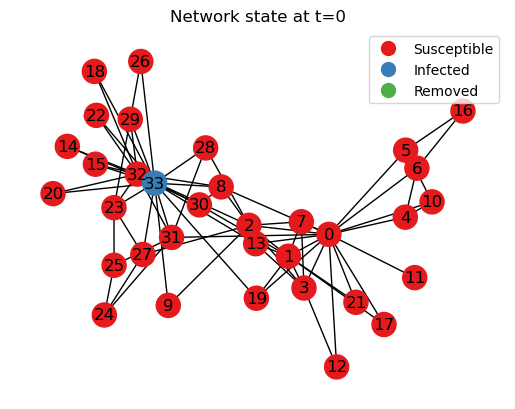

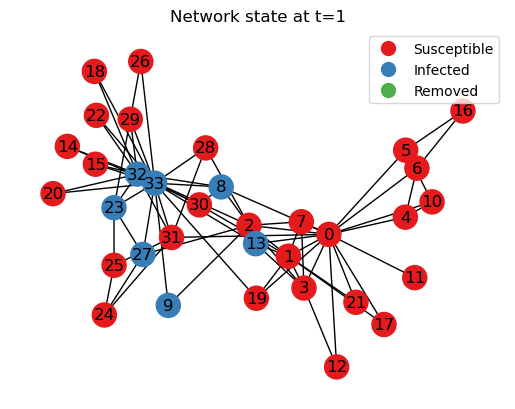

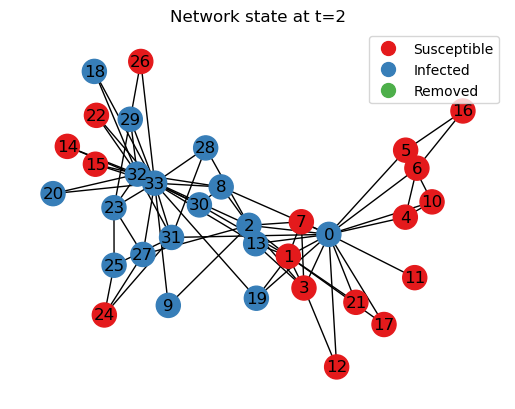

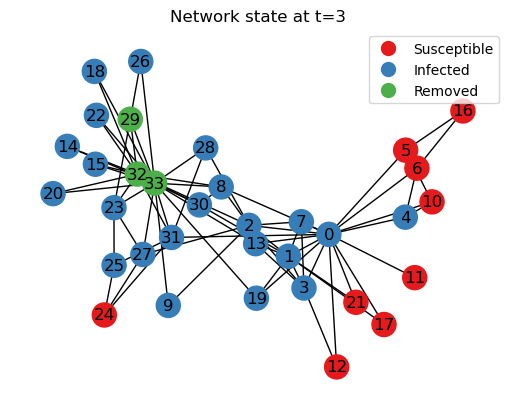

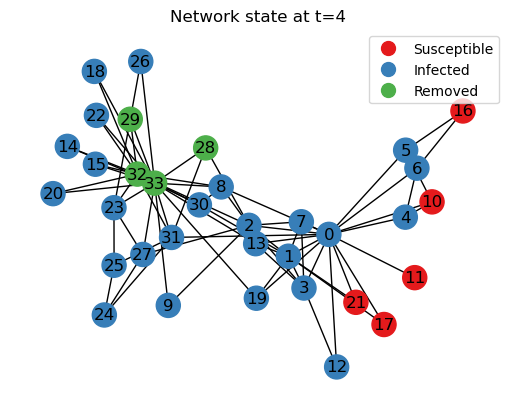

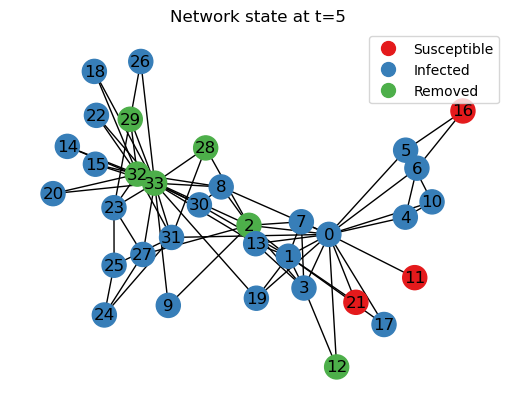

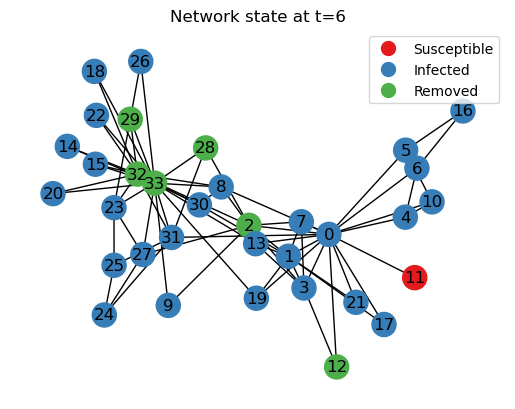

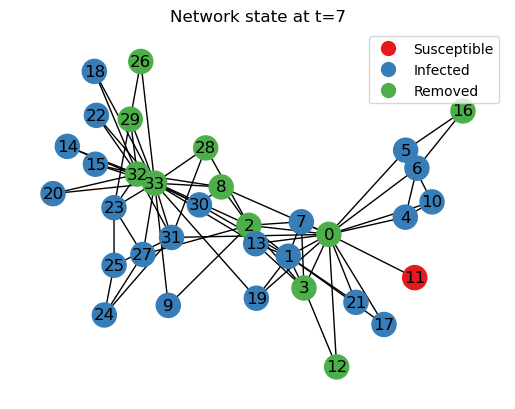

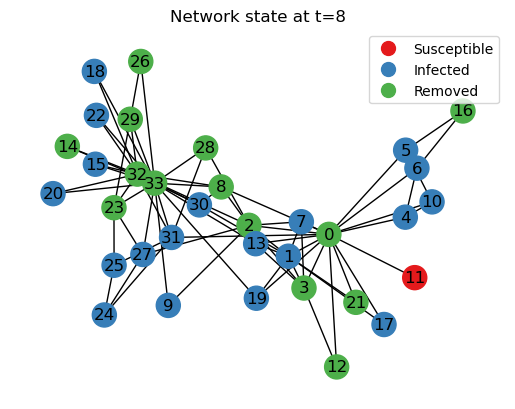

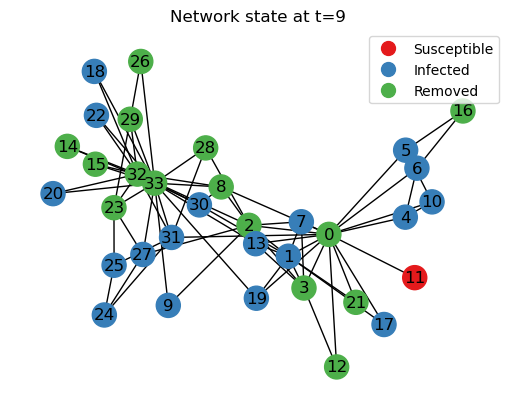

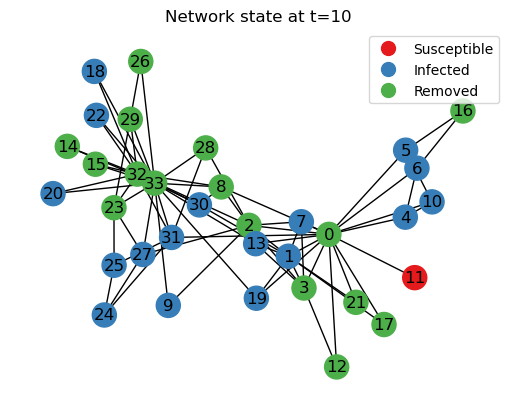

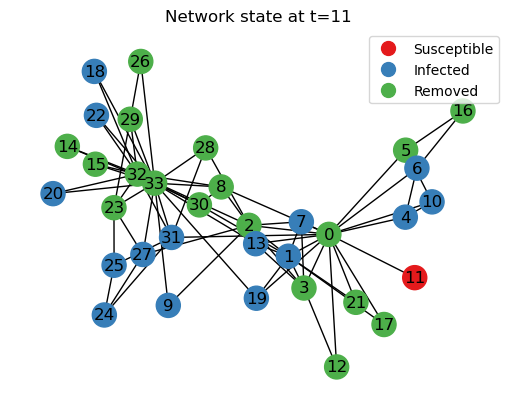

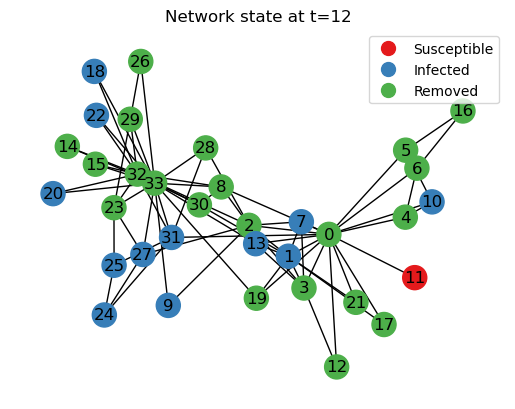

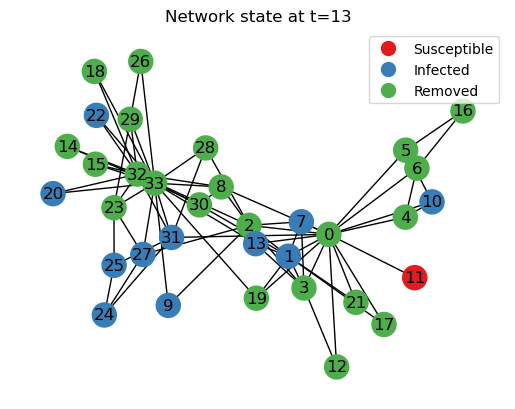

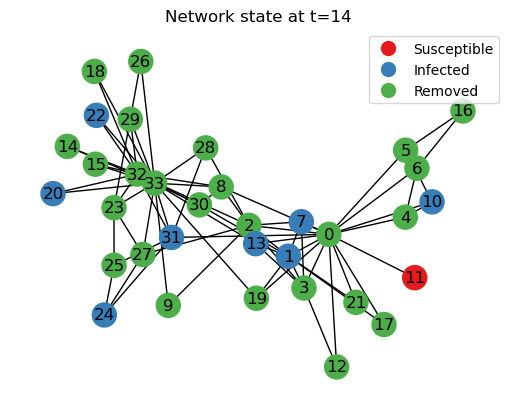

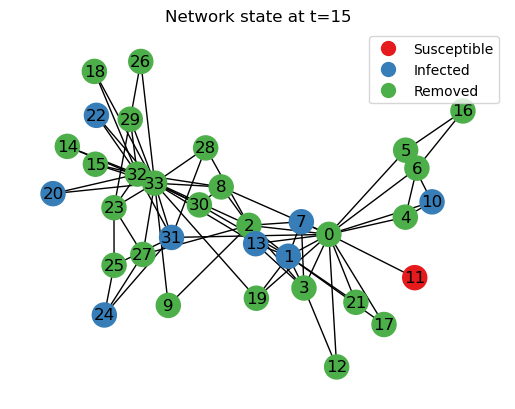

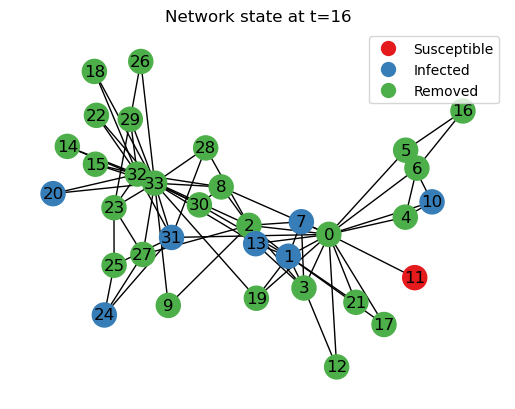

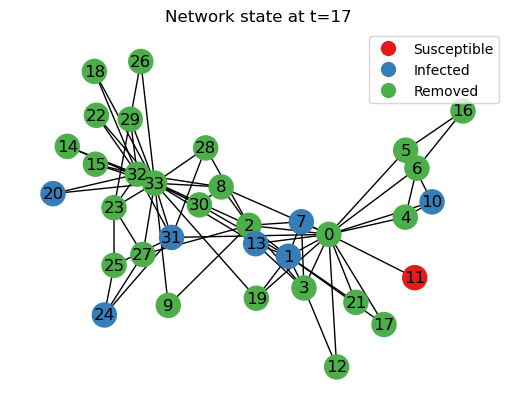

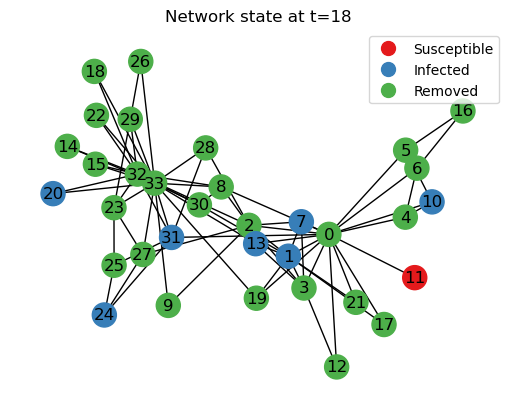

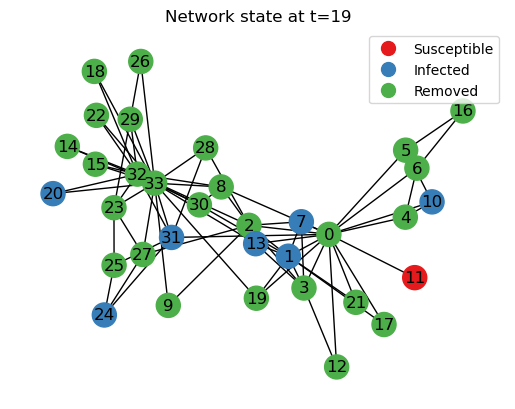

In [32]:
print_evolution(iterations, g, model)

## Exercise
Can you speed up the infection by choosing a different one? Explain your selection.

In [33]:
# Model selection
model = ep.SIRModel(g)
infected_nodes=[24]
# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.4)
cfg.add_model_parameter("gamma", 0.1)
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
n_iters = 20 # number of iterations
iterations = model.iteration_bunch(n_iters)


# print a node's possible states
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

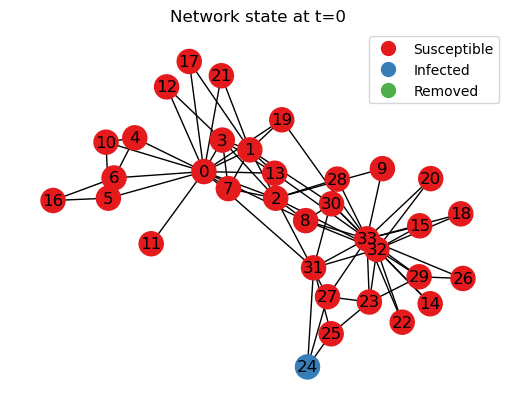

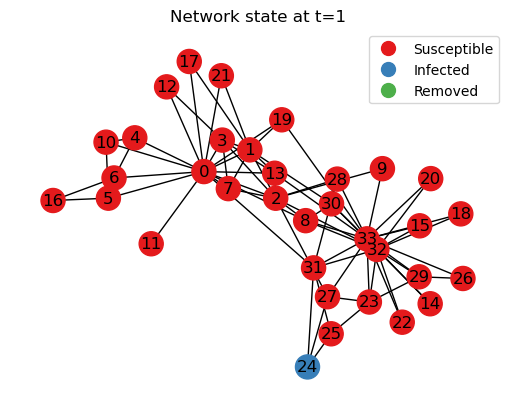

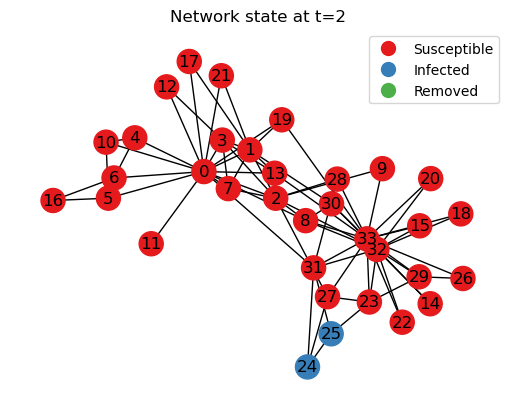

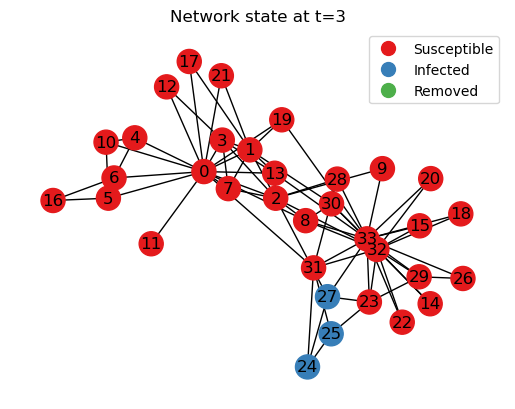

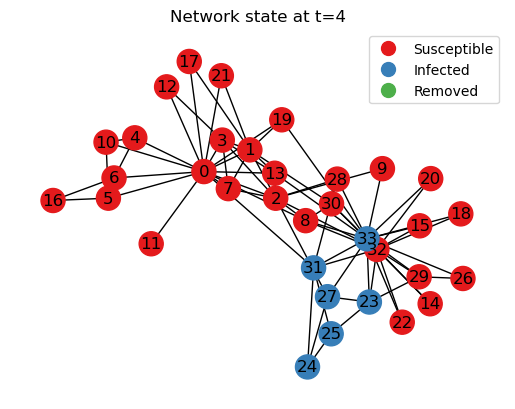

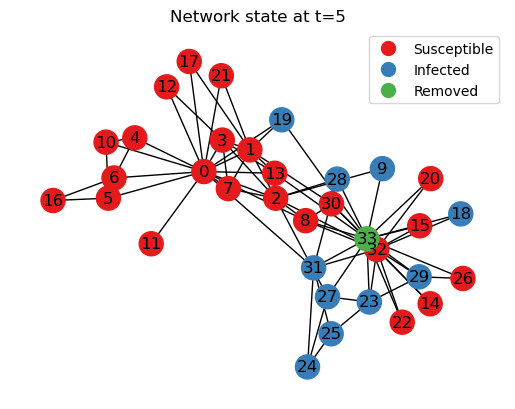

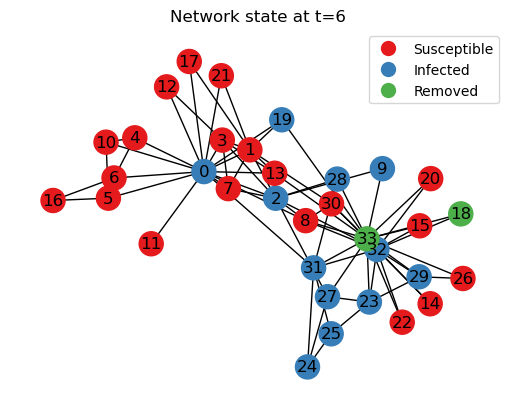

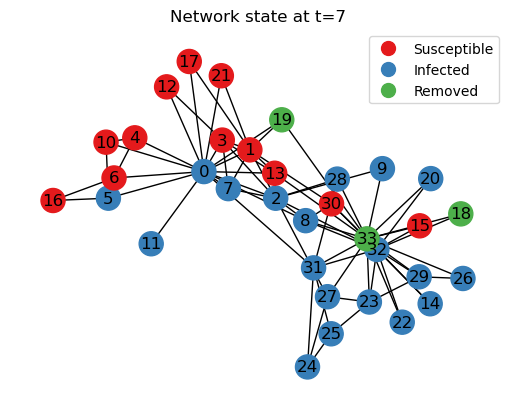

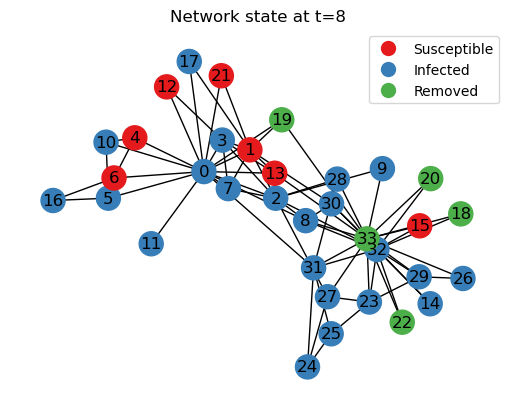

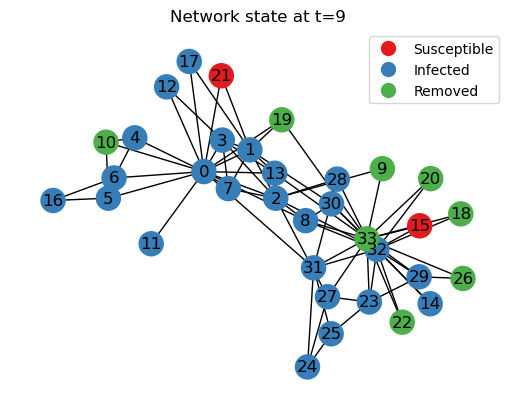

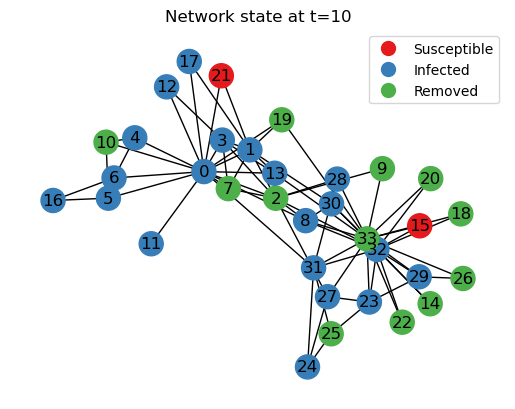

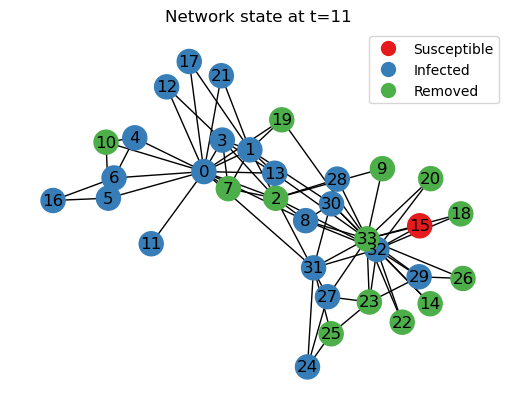

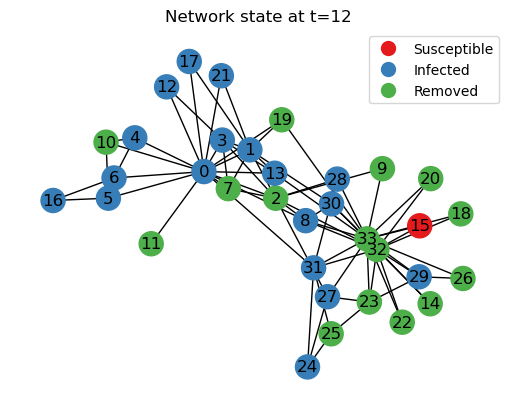

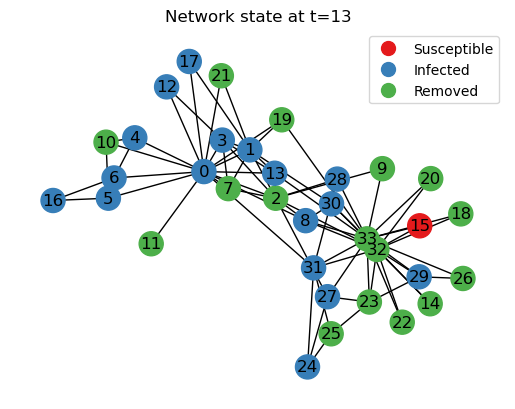

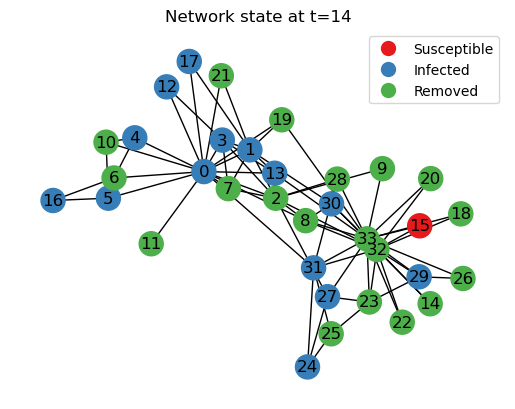

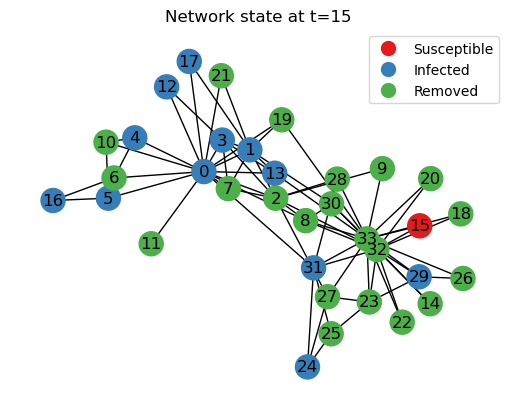

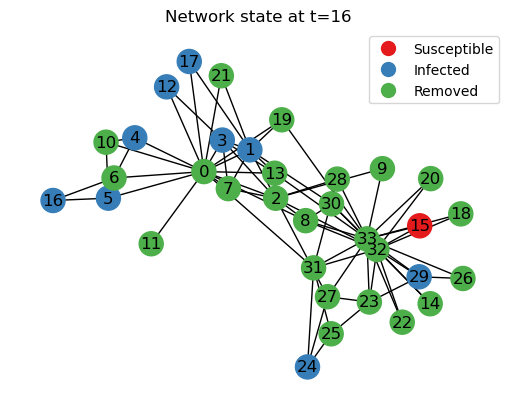

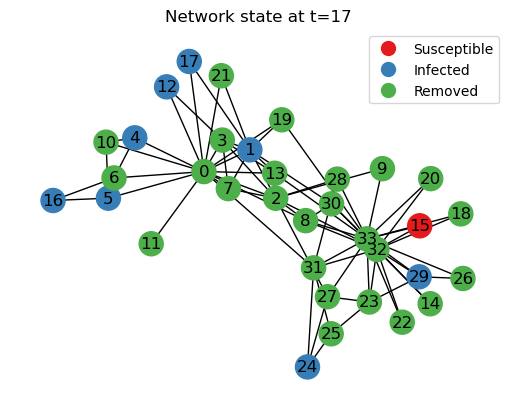

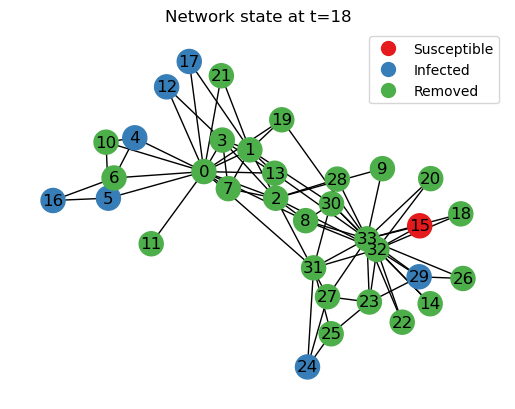

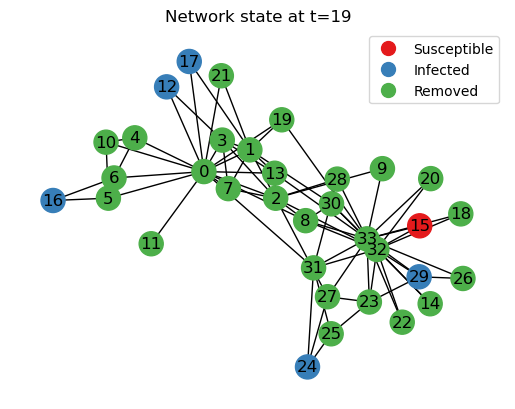

In [34]:
print_evolution(iterations, g, model)